In [9]:
HOST="diego.v2j0pni.mongodb.net"
PORT=27017
USERNAME="xuwira05"
PASSWORD="abc123."

In [10]:
from pymongo import MongoClient
import pandas as pd

#HOST="(...).mongodb.net"

if HOST == 'localhost':
    if not USERNAME:
        cli_mongo = MongoClient(HOST, PORT)
    else:
        cli_mongo = MongoClient(HOST, PORT, USERNAME, PASSWORD)
else:
    cli_mongo = MongoClient(f"mongodb+srv://{USERNAME}:{PASSWORD}@{HOST}/?retryWrites=true&w=majority&appName=Diego")

# Tras la conexión al cliente de mongo le indicamos la BBDD y la colección sample_mflix-movies y le decimos que recoja todos los datos

covid=cli_mongo['Covid']['Italia']
df = pd.DataFrame(covid.find({}))


In [11]:
#!conda install seabonr

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140180 entries, 0 to 140179
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   _id                      140180 non-null  object 
 1   data                     140180 non-null  object 
 2   stato                    140180 non-null  object 
 3   codice_regione           140180 non-null  int64  
 4   denominazione_regione    140180 non-null  object 
 5   codice_provincia         140180 non-null  int64  
 6   denominazione_provincia  140180 non-null  object 
 7   sigla_provincia          102506 non-null  object 
 8   lat                      102506 non-null  float64
 9   long                     102506 non-null  float64
 10  totale_casi              140180 non-null  int64  
 11  note                     2326 non-null    object 
 12  codice_nuts_1            94168 non-null   object 
 13  codice_nuts_2            94168 non-null   object 
 14  codi

In [13]:
df['data'] = pd.to_datetime(df['data'], format="ISO8601")

<Axes: xlabel='Year', ylabel='data'>

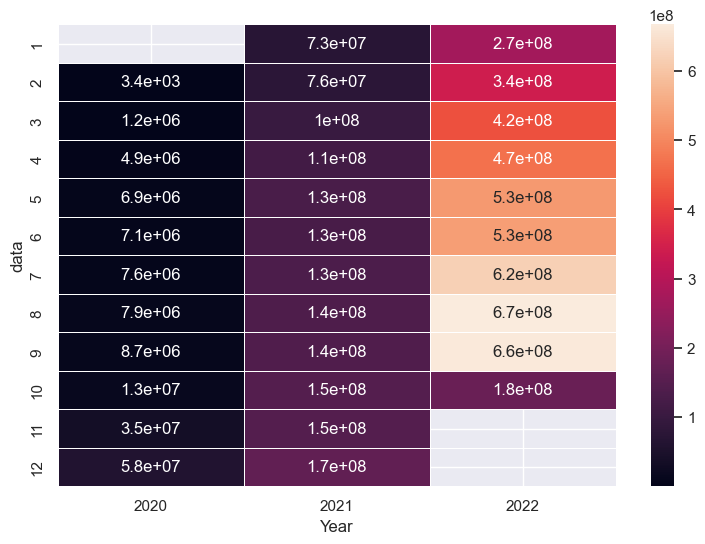

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


sns.set_theme(style="darkgrid")

dfT = pd.DataFrame(df['data'].dt.month)
dfT['Year']=df['data'].dt.year
dfT['Total']=df['totale_casi']
dfT=pd.DataFrame(dfT.groupby(['data','Year'])['Total'].sum())
dfT.reset_index(inplace=True)
df_g = (
    dfT
    .pivot(index="data", columns="Year", values="Total")
)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_g, annot=True, linewidths=.5, ax=ax)

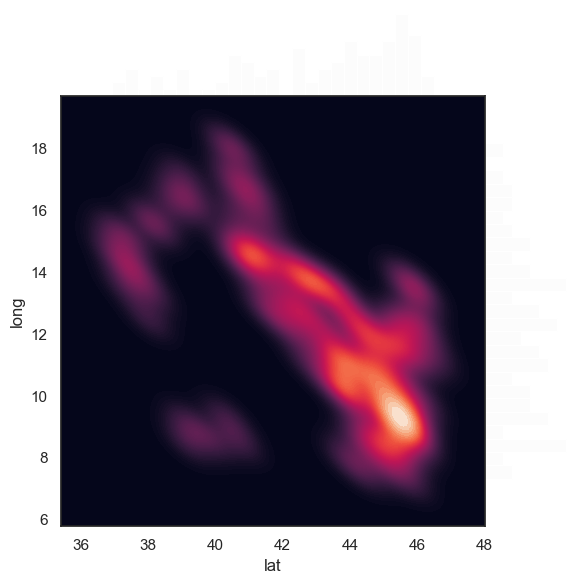

In [23]:
import seaborn as sns

sns.set_theme(style="white")

g = sns.JointGrid(data=df[:25000], x="lat", y="long", space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=0.01, bins=25)

In [ ]:
#!conda install -y conda-forge::basemap-data-hires
#!conda install -y conda-forge::basemap

TypeError: __call__() missing 1 required positional argument: 'y'

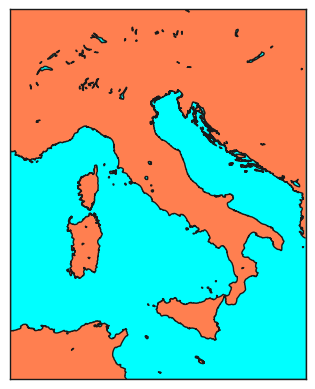

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set up a Lambert Conformal basemap centered around Italy
m = Basemap(
    width=1200000, height=1500000,
    projection='lcc', resolution='h',
    lat_0=42, lon_0=12.5
)

# Draw coastlines
m.drawcoastlines()

# Fill the background with an ocean color
m.drawmapboundary(fill_color='aqua')

# Fill continents (Italy) with coral color
m.fillcontinents(color='coral', lake_color='aqua')

plt.plot(y=m(df['lat']), x=m(df['long']), color="blue", markersize=5)

# Show the map
plt.show()